# Assignement 3, Data science in practice, MGT-415, 26.04.2020
## Aubry Yannick, Fontannaz Benoît, Muret Gabriel Pierre Etienne, Tedeschi Julien Brian, Terrier Cédric

# Pseudo - Code for SQL google Big query 
SELECT
  *
FROM
  `patents-public-data.patents.publications`,
  UNNEST(cpc) AS cpc
WHERE
   cpc.code LIKE "G06Q30/06%"
  


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [88]:
data = pd.read_excel('network_data.xlsx')
print(data.shape)
print(data.dtypes)
data.head()

(88234, 2)
NodeA    int64
NodeB    int64
dtype: object


,NodeA,NodeB
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [89]:
NETWORK = nx.Graph()
length_data = len(data)
for i in range(length_data):
    NETWORK.add_edge(data.NodeA[i],data.NodeB[i])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<function matplotlib.pyplot.show(*args, **kw)>

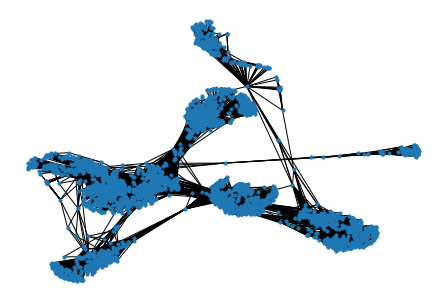

In [90]:
nx.draw(NETWORK, node_size=10)
plt.show

#draw_planar or draw_spectral or draw_circular or draw

The network with every point is represented below due to long computational time:
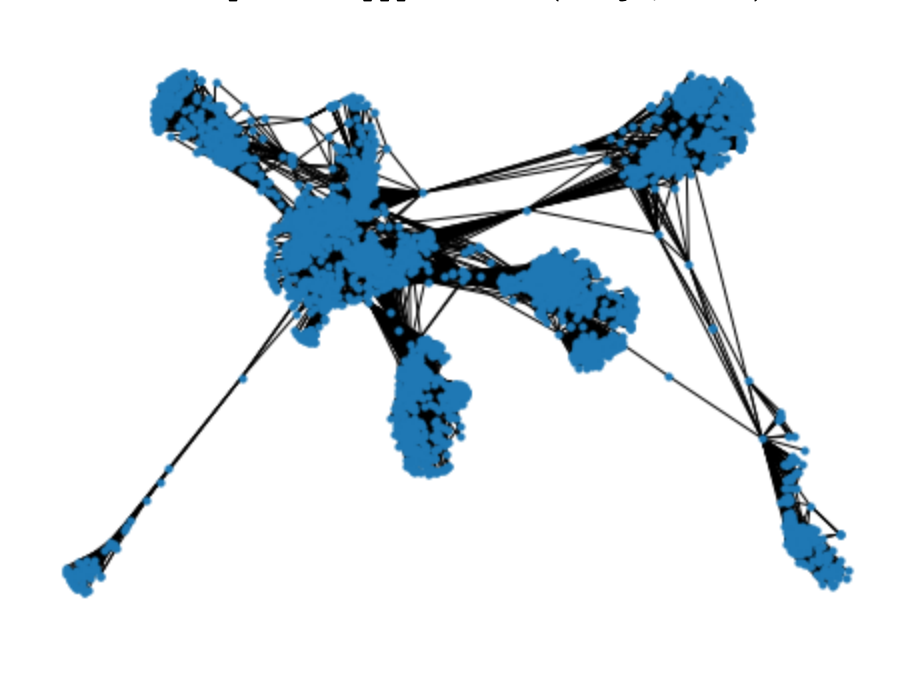

### We now analyse the graphic in a more detailed way, in order to get the Leader(s), Central Actors and Irrelevant ones.

In [91]:
results1 = pd.DataFrame(NETWORK.degree(), columns = ['node','degree'])

In [92]:
degree_centrality = nx.degree_centrality(NETWORK)
results2 = pd.DataFrame(degree_centrality.items(), columns = ['node','degree_centrality'])

In [93]:
betweenness = nx.betweenness_centrality(NETWORK)
results3 = pd.DataFrame(betweenness.items(), columns = ['node','betweenness'])

In [94]:
eig_centr = nx.eigenvector_centrality(NETWORK)
results4 = pd.DataFrame(eig_centr.items(), columns = ['node','eigenvector_centrality'])

In [95]:
results = results1.join(results2.degree_centrality).join(results3.betweenness).join(results4.eigenvector_centrality)

Text(0.5, 1.0, 'Eigenvector centrality distribution')

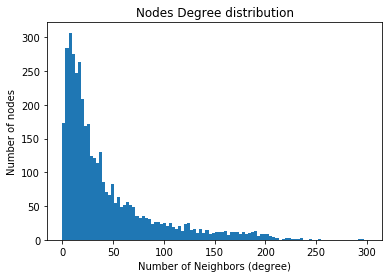

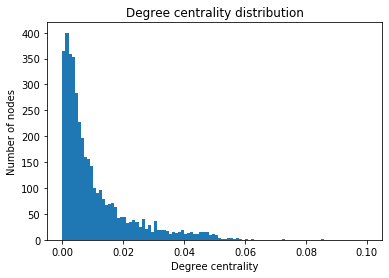

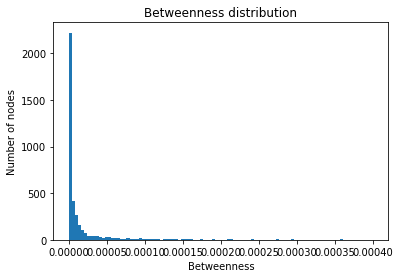

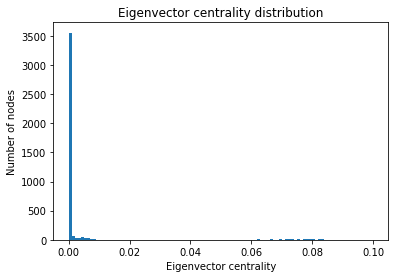

In [96]:
degree_hist = plt.hist(results.degree, 100, range = [0,300])
plt.xlabel('Number of Neighbors (degree)')
plt.ylabel('Number of nodes')
plt.title('Nodes Degree distribution')

plt.figure()
degree_hist = plt.hist(results.degree_centrality, 100, range = [0,0.1])
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title('Degree centrality distribution')

plt.figure()
degree_hist = plt.hist(results.betweenness, 100, range = [0,0.0004])
plt.xlabel('Betweenness')
plt.ylabel('Number of nodes')
plt.title('Betweenness distribution')

plt.figure()
degree_hist = plt.hist(results.eigenvector_centrality, 100, range = [0,0.1])
plt.xlabel('Eigenvector centrality')
plt.ylabel('Number of nodes')
plt.title('Eigenvector centrality distribution')

In [99]:
density = nx.density(NETWORK)
av_path = nx.average_shortest_path_length(NETWORK)
print('The density of the network is:', density)
print("The average shortest path length of the network is:", av_path)

KeyboardInterrupt: 

### We can get now try te define which are the Leader(s), Central Actors and Irrelevant Actors by looking at the nodes Degree, the Degree centrality, the Betweeness and the Eigenvector Centrality of each node
#### If We had to define only one leader, we'll try to define it as the one having the largest values from each of this parameter
For the Central Actors, it would be the one having the largest betweeness and the largest eigenvector centrality
The irrelevant actors would be the node having a really small betweeness and a small degree centrality

In [120]:
#eig_centr_sorted = sorted(eig_centr.items(), key=lambda x:x[1], reverse = True)
#print(eig_centr_sorted[:20])
#print(results.eigenvector_centrality)
results.head()

,node,degree,degree_centrality,betweenness,eigenvector_centrality
0,0,347,0.085934,1.463059e-01,3.391796e-05
1,1,17,0.004210,2.783274e-06,6.045346e-07
2,2,10,0.002476,7.595021e-08,2.233461e-07
3,3,17,0.004210,1.685066e-06,6.635648e-07
4,4,10,0.002476,1.840332e-07,2.236416e-07


In [119]:
results.describe()

,node,degree,degree_centrality,betweenness,eigenvector_centrality
count,4039.000000,4039.000000,4039.000000,4.039000e+03,4.039000e+03
mean,2019.000000,43.691013,0.010820,6.669574e-04,3.864341e-03
std,1166.103197,52.420605,0.012982,1.164634e-02,1.525485e-02
min,0.000000,1.000000,0.000248,0.000000e+00,6.385265e-14
25%,1009.500000,11.000000,0.002724,3.997507e-07,5.388575e-08
50%,2019.000000,25.000000,0.006191,2.918300e-06,8.885652e-07
75%,3028.500000,57.000000,0.014116,1.515292e-05,3.266349e-05
max,4038.000000,1045.000000,0.258791,4.805181e-01,9.540696e-02


In [152]:
results.head()

Central_Players = np.array([])
Leaders = np.array([])
Irrelevant_Actors = np.array([])

for i in range(4039):
    if results.loc[i].values[4]<5.388575e-08 and results.loc[i].values[3] < 0.0005:
        Irrelevant_Actors = np.append(Irrelevant_Actors, i)
    if results.loc[i].values[4]>0.08 and results.loc[i].values[3] > 0.1:
        Leaders = np.append(Leaders,i)
    if results.loc[i].values[4]>0.1 or results.loc[i].values[3]>0.01:
        Central_Players =np.append(Central_Players, i)
   
        

print("Nombre de irrelevants actors :",len(Irrelevant_Actors))
print("Nombre de Central Players : ",len(Central_Players))
print("Nombre de Leaders :", len(Leaders))
print(Leaders)
print(Central_Players)

results.head(108)


Nombre de irrelevants actors : 967
Nombre de Central Players :  24
Nombre de Leaders : 1
[352.]
[   0.   58.  107.  136.  171.  348.  349.  350.  351.  352.  366.  371.
  571.  951. 1063. 1203. 1710. 1754. 1821. 1827. 1831. 1843. 2006. 2008.]


,node,degree,degree_centrality,betweenness,eigenvector_centrality
0,0,347,0.085934,1.463059e-01,3.391796e-05
1,1,17,0.004210,2.783274e-06,6.045346e-07
2,2,10,0.002476,7.595021e-08,2.233461e-07
3,3,17,0.004210,1.685066e-06,6.635648e-07
4,4,10,0.002476,1.840332e-07,2.236416e-07
...,...,...,...,...,...
103,103,16,0.003962,9.419041e-05,2.509602e-05
104,104,32,0.007925,3.015535e-06,1.435568e-06
105,105,14,0.003467,4.083494e-07,6.408392e-07
106,106,8,0.001981,3.638794e-07,4.032095e-07


[   0.   58.  107.  350.  351.  352.  371.  571. 1710. 1821. 1843. 2006.]


In [ ]:
nx.draw(NETWORK, node_size = (results.eigenvector_centrality)*results.eigenvector_centrality*200000)
plt.show

In [ ]:
nx.draw(NETWORK, node_size = (results.degree)*results.degree/1000)
plt.show

In [ ]:
nx.draw(NETWORK, node_size = (results.degree_centrality)*results.degree_centrality*15000)
plt.show

In [ ]:
nx.draw(NETWORK, node_size = (results.betweenness)*results.betweenness*20000)
plt.show

In [47]:
#within a cluster, how many nodes to reachable in N steps, edge/edge possible

## Une autre approche plus basique, à ignorer si les résultats sont déjà satisfaisants au dessus

In [60]:
B = nx.adjacency_matrix(NETWORK, nodelist=None)
Adjacency = B.todense()

Sum = np.sum(Adjacency, axis=0) #Adjacent matrix of the undirected graph
Sum = Sum.T
Sum = pd.DataFrame(data = Sum)
Sum.columns = ["Total_Number_of_links"]

Childrens = data["NodeA"].value_counts()
Parents = data["NodeB"].value_counts()

Sum["Number_of_Parents"]=Parents
Sum["Number_of_Childrens "]=Childrens

Sum = Sum.fillna(0)
Sum.head()

,Total_Number_of_links,Number_of_Parents,Number_of_Childrens
0,347,0.0,347.0
1,17,1.0,16.0
2,10,1.0,9.0
3,17,1.0,16.0
4,10,1.0,9.0


We can classify the irrelevant patents for the one who do not have any "childrens" in the graph at all. 
However,this vision is simplified as the patents might be so recent that no following has been generated yet
We would then need the publication date of the patents to get a more accurate vision

In [61]:
Sum.describe()
#Irrelevant = Sum.Values["Number of Childrens" = NaN]

,Total_Number_of_links,Number_of_Parents,Number_of_Childrens
count,4039.000000,4039.000000,4039.000000
mean,43.691013,21.845506,21.845506
std,52.420605,29.269857,38.904137
min,1.000000,0.000000,0.000000
25%,11.000000,4.000000,3.000000
50%,25.000000,11.000000,10.000000
75%,57.000000,27.000000,26.000000
max,1045.000000,251.000000,1043.000000


The following assumptions were made to classify the nodes : 
The central players should be the nodes having a large number of Childrens as well as a large number of Parents.
The Leader (or co-leaders if many are found) should be the nodes having an extremely high number of Childrens.
The Irrelevant Actors should be the one having a very small number of Childrens. 

In [72]:
Sum.loc[0].values[2]

347.0

445

[1. 2.]
